<a href="https://colab.research.google.com/github/mallikaalvala/Machine-learning-Models/blob/main/formulation_ml_regression_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression Models for Formulation Data
This notebook demonstrates how to apply **Linear Regression**, **Ridge Regression**, and **Lasso Regression** models on formulation data to predict a numeric target variable — for example, dissolution percentage at 30 minutes.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/formulation_data_sample.csv")
print("Shape:", df.shape)
df.head()

Shape: (200, 15)


,formulation_id,drug_name,dosage_form,polymer_type,binder,filler,disintegrant,particle_size,drug_loading,hardness,friability,disintegration_time,dissolution_30min,stability_3month,pass_fail
0,F001,DrugC,Injection,CMC,Starch,Dicalcium Phosphate,Croscarmellose Sodium,104.3,42.4,8.1,0.19,6.0,68.5,61.2,Fail
1,F002,DrugD,Suspension,CMC,PVA,Lactose,Crospovidone,115.9,20.5,7.0,0.69,12.3,46.8,44.9,Fail
2,F003,DrugA,Injection,PEG,PVA,Dicalcium Phosphate,Sodium Starch Glycolate,156.8,39.8,5.8,0.38,8.4,69.2,65.8,Fail
3,F004,DrugC,Tablet,HPMC,Lactose,Dicalcium Phosphate,Croscarmellose Sodium,175.2,21.3,7.7,0.46,10.5,95.2,92.1,Pass
4,F005,DrugC,Suspension,CMC,MCC,Lactose,Crospovidone,149.7,43.7,3.8,0.87,8.7,71.2,NaN,Fail


In [ ]:
# Basic cleaning
# Drop rows with missing target values
df = df.dropna(subset=['dissolution_30min'])

# Identify features (X) and target (y)
X = df.drop(columns=['formulation_id','dissolution_30min','pass_fail'])
y = df['dissolution_30min']

# Separate categorical and numeric columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=[np.number]).columns

print("Categorical columns:", list(cat_cols))
print("Numeric columns:", list(num_cols))

Categorical columns: ['drug_name', 'dosage_form', 'polymer_type', 'binder', 'filler', 'disintegrant']
Numeric columns: ['particle_size', 'drug_loading', 'hardness', 'friability', 'disintegration_time', 'stability_3month']


In [ ]:
# Preprocessing: OneHotEncode categorical + scale numeric
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RidgeRegression": Ridge(alpha=1.0),
    "LassoRegression": Lasso(alpha=0.1)
}

results = {}

# Redefine preprocessor to include imputation for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Add imputer
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))]) # Added handle_unknown for robustness

# Recreate preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} -> MSE: {mse:.3f}, R2: {r2:.3f}")

LinearRegression -> MSE: 9.789, R2: 0.959
RidgeRegression -> MSE: 9.932, R2: 0.959
LassoRegression -> MSE: 10.091, R2: 0.958


Best model: LinearRegression


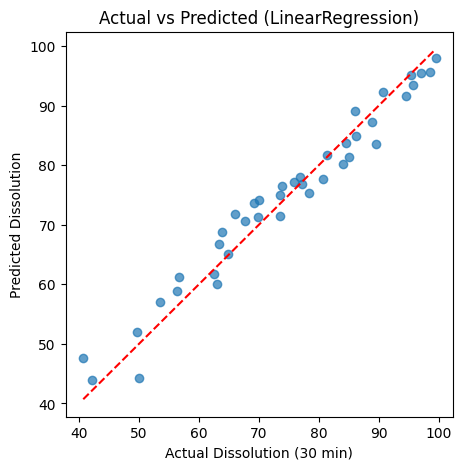

In [ ]:
# Compare actual vs predicted for best model (based on R2)
best_model_name = max(results, key=lambda x: results[x]['R2'])
print("Best model:", best_model_name)

best_model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', models[best_model_name])])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Dissolution (30 min)")
plt.ylabel("Predicted Dissolution")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [ ]:
# Save model performance summary
pd.DataFrame(results).T.to_csv("formulation_model_performance.csv")
print("Model performance saved to formulation_model_performance.csv")

Model performance saved to formulation_model_performance.csv
